In [8]:



# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

# load pre-trained word2vec embeddings
# The embeddings can be downloaded from command prompt:
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model = gensim.models. KeyedVectors.load_word2vec_format('ententen13_tt2_1.vec.1',  unicode_errors='ignore', binary=False, limit=500000) 
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


[-0.47031   0.072255 -0.67489   0.079788  0.026414  0.26541   0.43609
 -0.17122   0.2122   -0.2773    0.057266 -0.17644  -0.4507    0.13851
  0.60553  -0.27121  -0.45229   0.17825   0.28313  -0.13885  -0.40505
 -0.098298 -0.026429  0.24597   0.64428  -0.19655   0.55913  -0.28112
  0.010283  0.12738  -0.2233    0.011319 -0.03043  -0.19661   0.23171
  0.39509   0.17244   0.055129 -0.41087  -0.39698  -0.49079  -0.57116
 -0.32901  -0.02088  -0.75948  -0.24222  -0.05914   0.069196 -0.029959
 -0.4363    0.23536  -0.18965  -0.45899   0.60599  -0.46826  -0.20072
 -0.012007 -0.11901   0.85819  -0.070168  0.29491  -0.15334   0.043928
 -0.17269  -0.7333    0.055231  0.37606  -0.096628  0.44576  -0.34947
  0.21016   0.3089    0.16592   0.61813   0.21489  -0.096808  0.29237
 -0.18837  -0.20151   0.58243  -0.15855  -0.39944   0.58768   0.68998
  0.12622   0.21399   0.020049  0.1542    0.091735 -0.12628  -0.10995
 -0.45996   0.14956  -0.055219 -0.37773   0.15163  -0.3704   -0.050649
  0.057327  0.030

<IPython.core.display.Javascript object>


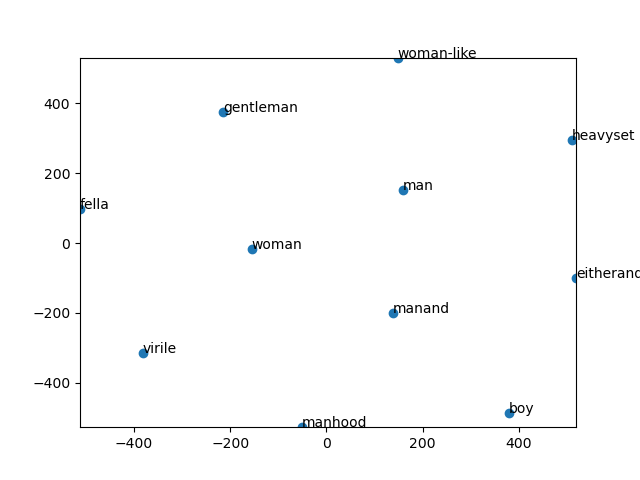

In [9]:
display_closestwords_tsnescatterplot(model, 'man')